In [3]:
import numpy as np


In [76]:
class Opacity_Tool_Profiles:
    # This class uses the Opacity Profiles generated by the DIANA PROJECT OPACITY TOOL
    # link: http://dianaproject.wp.st-andrews.ac.uk/data-results-downloads/fortran-package/
    #
    #
    # These dust opacity will be used in calculations to produce Disk Models that follows a radiative transfer
    # that will be modified to use these Profiles.
    # 
    #
    # The initializer will load in a txt file that consists of variations of DUST OPACITY MODELS (produce with
    # varying amax, apow, with na = 100 and lmax = 10000). Then we will preload in the data from each file in a 3D 
    # array which will be called on when searching for profile file depending on a given amax and apow.
    
    def __init__(self):
        
        # Amax and Apow used to make Opac. Prof. from DIANA PROJECT OPACITY TOOL.
        self.amax_grid = np.logspace(0,5,6,endpoint=True)
    
        # np.round is used due to errors w/ linspace cause values of n.0 to actually be n.00000000054, 
        # np.arange causes n.0 to actually be n. where n is just some interger.
        self.apow_grid = np.round(np.linspace(2.5,4.5,21,endpoint=True),2)
        
        # Define the path to directory on computer.
        Opacity_Profile_List = "/home/tyler/Research/Research Tools/DianaProject/Opacity_Profiles/OpacityProfiles.txt"
        
        # Load in file with self. Will be used through this class.
        self.File_List = np.genfromtxt(Opacity_Profile_List, dtype = str)
        #print(self.File_List)
        
        # Identify total number of files in txt file of models produced. 
        Total_Files = int(len(self.File_List))
        
        # Define Index value for Opacity Profile List
        Index_grid = np.arange(0, Total_Files,1)
        
        # 3D array comprised of Index grid and empty set that will be filled with Opacitys at various lambda
        self.Opacity_Profiles_grid = Index_grid[:,None,None]*np.zeros((300,2))
        
        # Loop to complete 3D grid with Opacity Profiles
        for index in Index_grid:
            
            # Select File from list of Opacity Profiles
            File = self.File_List[index]
            
            # Define the Path at which the file is located
            Opacity_Profile_Path = "/home/tyler/Research/Research Tools/DianaProject/Opacity_Profiles/"+File
            
            # Load Profile use only column 1 and 2 i.e WAVELEGTH and Opacity_absorp
            Opacity_Profile_Data_Set = np.genfromtxt(Opacity_Profile_Path, comments="#", usecols=(0,1))
            
            # Fill Opacity Profile grid. Each index corresponds the the index in file list values
            self.Opacity_Profiles_grid[index] = Opacity_Profile_Data_Set
            
    
    
    def SHOW_GRID(self):
        # test to see if grid appears
        print (self.Opacity_Profiles_grid)
        
    
    
    def F_O_P_I(self,amax,apow):
        # Find Opacity Profile Index
        
        # This function takes in inputs: self, amax, apow
        # and find the file closest to inputs, and return the 
        # index value that corresponds to the file.
        # This value will be used to locate data the that correlates
        # to the file in the Opacity_Profile_grid

        # Condition check for amax
        if amax >= 1 and amax <= 1e5:
            
            # Find the index closest to amax_grid value
            amax_index = np.argwhere(abs(amax-self.amax_grid) == min(abs(amax-self.amax_grid)))
            
            # Extract value and turn into string            
            model_amax = str(np.take(self.amax_grid, amax_index[0])[0])
            

        # Condition check for apow
        if apow >= 2.5 and apow <= 4.5:
            
            # Find the index closest to apow_grid value
            apow_index = np.argwhere(abs(apow-self.apow_grid) == min(abs(apow-self.apow_grid)))
            
            # Extract value and turn into string
            model_apow = str(np.take(self.apow_grid, apow_index[0])[0])
            


        # Define file name with found model values
        File_name = "OpacityTool_amax_"+model_amax+"_apow_"+model_apow+".dat"
        print(File_name)
        
        # Find index value with respect to the file list of models
        File_List_Index = np.where(File_name == self.File_List)
        print(File_List_Index)
        
        return(File_List_Index)
    
    def Opacity_Profile(self, amax, apow):
        # From Index Select Profile
        # This funciton takes inputs: self, amax, apow
        # returns dataset corresponding to profile selected
        
        # Define index
        index = self.F_O_P_I(amax, apow)
        print(index)
        
        # Return dataset corresponding to index #
        return(self.Opacity_Profiles_grid[index])
        

        

In [77]:
test = Opacity_Tool_Profiles()

['OpacityTool_amax_1.0_apow_4.5.dat' 'OpacityTool_amax_1.0_apow_4.4.dat'
 'OpacityTool_amax_1.0_apow_4.3.dat' 'OpacityTool_amax_1.0_apow_4.2.dat'
 'OpacityTool_amax_1.0_apow_4.1.dat' 'OpacityTool_amax_1.0_apow_4.0.dat'
 'OpacityTool_amax_1.0_apow_3.9.dat' 'OpacityTool_amax_1.0_apow_3.8.dat'
 'OpacityTool_amax_1.0_apow_3.7.dat' 'OpacityTool_amax_1.0_apow_3.6.dat'
 'OpacityTool_amax_1.0_apow_3.5.dat' 'OpacityTool_amax_1.0_apow_3.4.dat'
 'OpacityTool_amax_1.0_apow_3.3.dat' 'OpacityTool_amax_1.0_apow_3.2.dat'
 'OpacityTool_amax_1.0_apow_3.1.dat' 'OpacityTool_amax_1.0_apow_3.0.dat'
 'OpacityTool_amax_1.0_apow_2.9.dat' 'OpacityTool_amax_1.0_apow_2.8.dat'
 'OpacityTool_amax_1.0_apow_2.7.dat' 'OpacityTool_amax_1.0_apow_2.6.dat'
 'OpacityTool_amax_1.0_apow_2.5.dat' 'OpacityTool_amax_10.0_apow_4.5.dat'
 'OpacityTool_amax_10.0_apow_4.4.dat' 'OpacityTool_amax_10.0_apow_4.3.dat'
 'OpacityTool_amax_10.0_apow_4.2.dat' 'OpacityTool_amax_10.0_apow_4.1.dat'
 'OpacityTool_amax_10.0_apow_4.0.dat' 'Opacity

OpacityTool_amax_1.0_apow_2.5.dat
(array([20]),)
(array([20]),)
(1, 300, 2)
[1.22923547e+04 1.22718623e+04 1.22493015e+04 1.22246450e+04
 1.21976931e+04 1.21685066e+04 1.21370925e+04 1.21031562e+04
 1.20668246e+04 1.20281863e+04 1.19868914e+04 1.19429885e+04
 1.18965122e+04 1.18473917e+04 1.17957871e+04 1.17416669e+04
 1.16848161e+04 1.16271593e+04 1.16580293e+04 1.16743019e+04
 1.16720078e+04 1.16555231e+04 1.16406364e+04 1.16194856e+04
 1.15667548e+04 1.14953474e+04 1.14407238e+04 1.13361839e+04
 1.11148499e+04 1.09398740e+04 1.09008459e+04 1.09378789e+04
 1.10110585e+04 1.11459007e+04 1.13368265e+04 1.16372250e+04
 1.18798441e+04 1.20229512e+04 1.21333054e+04 1.22486364e+04
 1.23472703e+04 1.24057510e+04 1.24267751e+04 1.24198538e+04
 1.23915207e+04 1.23335807e+04 1.22523277e+04 1.21470711e+04
 1.20357147e+04 1.19242516e+04 1.18135027e+04 1.17007553e+04
 1.15679628e+04 1.14462518e+04 1.13152781e+04 1.11897734e+04
 1.10456572e+04 1.08971137e+04 1.07415660e+04 1.05731611e+04
 1.039800

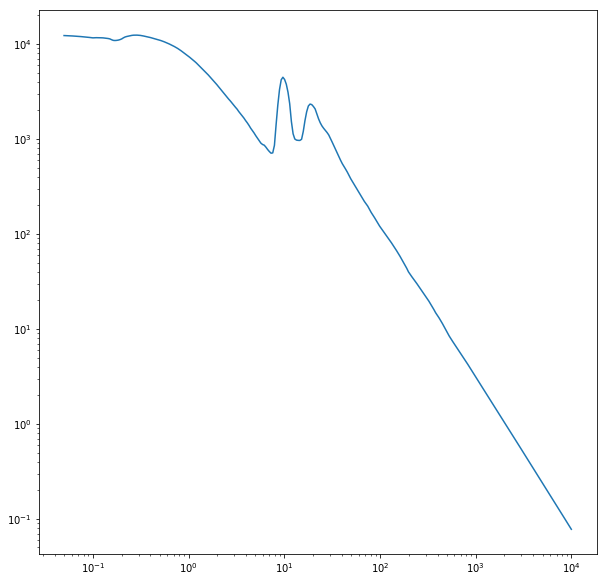

In [91]:
A = test.Opacity_Profile(1, 2.5)
import matplotlib.pyplot as plt
%matplotlib inline

print (A.shape)
print (A[0,:,1])
plt.figure(figsize=(10,10))
plt.loglog(A[0,:,0],A[0,:,1])

In [ ]:
test.F_O_P_I

In [66]:
A = test.SHOW_GRID()


[[[5.00000000e-02 4.19682164e+04]
  [5.20833849e-02 4.15722052e+04]
  [5.42535797e-02 4.11510070e+04]
  ...
  [9.21598174e+03 8.87138851e-02]
  [9.59999049e+03 8.30270954e-02]
  [1.00000000e+04 7.76955939e-02]]

 [[5.00000000e-02 3.99558245e+04]
  [5.20833849e-02 3.95927458e+04]
  [5.42535797e-02 3.92064674e+04]
  ...
  [9.21598174e+03 8.87138862e-02]
  [9.59999049e+03 8.30270963e-02]
  [1.00000000e+04 7.76955947e-02]]

 [[5.00000000e-02 3.79159705e+04]
  [5.20833849e-02 3.75851315e+04]
  [5.42535797e-02 3.72330530e+04]
  ...
  [9.21598174e+03 8.87138874e-02]
  [9.59999049e+03 8.30270973e-02]
  [1.00000000e+04 7.76955955e-02]]

 ...

 [[5.00000000e-02 1.30631015e-01]
  [5.20833849e-02 1.31336796e-01]
  [5.42535797e-02 1.31330327e-01]
  ...
  [9.21598174e+03 6.79318794e-02]
  [9.59999049e+03 6.70984927e-02]
  [1.00000000e+04 6.53251878e-02]]

 [[5.00000000e-02 1.03727292e-01]
  [5.20833849e-02 1.04097708e-01]
  [5.42535797e-02 1.04096622e-01]
  ...
  [9.21598174e+03 6.45315102e-02]
  [9